# Create a crowd of pedestrians from the ANSURII dataset
Visit the [database website](https://ph.health.mil/topics/workplacehealth/ergo/Pages/Anthropometric-Database.aspx)

The created crowd is made of agents drawn uniformly from the ANSURII dataset. 

## With default parameters

In [ ]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import Image
from shapely.geometry import Polygon

import configuration.backup.crowd_to_zip_and_reverse as fun_zip
from configuration.models.crowd import Crowd
from streamlit_app.plot import plot

# Initialize the crowd with default parameters
crowd = Crowd()
crowd.create_agents()
crowd.pack_agents_with_forces()

# Visualize the crowd
fig = plot.display_crowd2D(crowd)[0]
plt.close(fig)
cwd = Path(os.path.abspath(""))
image_path = cwd.parent.parent / "data" / "images" / "generated" / "ANSURII_crowd.png"
fig.savefig(image_path, format="png", dpi=75)
Image(filename=str(image_path))

# Download the xml configuration files necessary for the simulation to a zip format
cwd = Path(os.path.abspath(""))  # Current working directory
output_zip_path = cwd.parent.parent / "data" / "tutorial_configuration_files" / "crowd_ANSURII.zip"
fun_zip.save_crowd_data_to_zip(crowd, output_zip_path)

## Changing default parameters

We invite you to play with these parameters and see by yourself the effect on the overall crowd.

In [10]:
boundaries = Polygon([(0.0, 0.0), (220.0, 0.0), (220.0, 180.0), (0.0, 180.0)])  # (cm)
NUMBER_AGENTS: int = 20
REPULSION_LENGTH: float = 5.0  # (cm)
DESIRED_DIRECTION: float = 90.0  # (degrees)

## On a grid

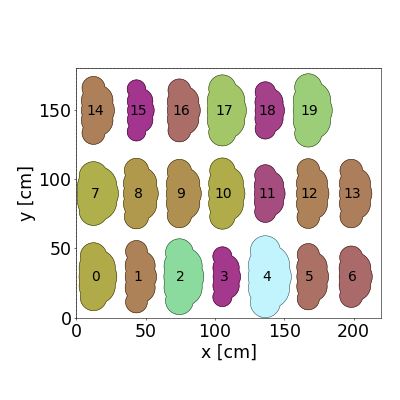

In [13]:
# Parameters
VARIABLE_ORIENTATION: bool = True
boundaries = Polygon([(0.0, 0.0), (220.0, 0.0), (220.0, 180.0), (0.0, 180.0)])  # (cm)

# Create a new crowd with specified parameters
crowd = Crowd(boundaries=boundaries)
crowd.create_agents(number_agents=NUMBER_AGENTS)
crowd.pack_agents_on_grid()

# Visualize results
fig = plot.display_crowd2D(crowd)[0]
plt.close(fig)
cwd = Path(os.path.abspath(""))
image_path = cwd.parent.parent / "data" / "images" / "generated" / "ANSURII_crowd_2.png"
fig.savefig(image_path, format="png", dpi=50)
Image(filename=str(image_path))

### With variable orientation for each agent

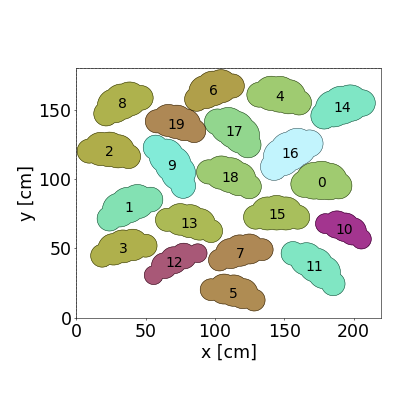

In [4]:
# Parameters
VARIABLE_ORIENTATION: bool = True
boundaries = Polygon([(0.0, 0.0), (220.0, 0.0), (220.0, 180.0), (0.0, 180.0)])  # (cm)

# Create a new crowd with specified parameters
crowd = Crowd(boundaries=boundaries)
crowd.create_agents(number_agents=NUMBER_AGENTS)
crowd.pack_agents_with_forces(
    repulsion_length=REPULSION_LENGTH,
    desired_direction=DESIRED_DIRECTION,
    variable_orientation=VARIABLE_ORIENTATION,
)

# Visualize results
fig = plot.display_crowd2D(crowd)[0]
plt.close(fig)
cwd = Path(os.path.abspath(""))
image_path = cwd.parent.parent / "data" / "images" / "generated" / "ANSURII_crowd_3.png"
fig.savefig(image_path, format="png", dpi=50)
Image(filename=str(image_path))

### Without variable orientation

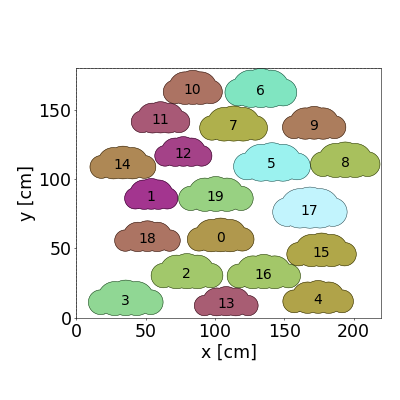

In [5]:
# Constant
VARIABLE_ORIENTATION: bool = False
boundaries = Polygon([(0.0, 0.0), (220.0, 0.0), (220.0, 180.0), (0.0, 180.0)])  # (cm)

# Create a new crowd with the same boundaries
crowd = Crowd(boundaries=boundaries)
crowd.create_agents(number_agents=NUMBER_AGENTS)
crowd.pack_agents_with_forces(
    repulsion_length=REPULSION_LENGTH,
    desired_direction=DESIRED_DIRECTION,
    variable_orientation=VARIABLE_ORIENTATION,
)

# Visualize results
fig = plot.display_crowd2D(crowd)[0]
plt.close(fig)
cwd = Path(os.path.abspath(""))
image_path = cwd.parent.parent / "data" / "images" / "generated" / "ANSURII_crowd_4.png"
fig.savefig(image_path, format="png", dpi=50)
Image(filename=str(image_path))

### With more space around each agent

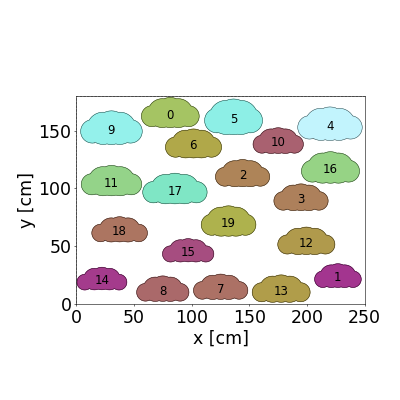

In [6]:
# Parameter
REPULSION_LENGTH: float = 25.0  # (cm)
boundaries = Polygon([(0.0, 0.0), (250.0, 0.0), (250.0, 180.0), (0.0, 180.0)])  # (cm)

# Create a new crowd with the same boundaries
crowd = Crowd(boundaries=boundaries)
crowd.create_agents(number_agents=NUMBER_AGENTS)
crowd.pack_agents_with_forces(
    repulsion_length=REPULSION_LENGTH,
    desired_direction=DESIRED_DIRECTION,
    variable_orientation=VARIABLE_ORIENTATION,
)

# Visualize the crowd
fig = plot.display_crowd2D(crowd)[0]
plt.close(fig)
cwd = Path(os.path.abspath(""))
image_path = cwd.parent.parent / "data" / "images" / "generated" / "ANSURII_crowd_5.png"
fig.savefig(image_path, format="png", dpi=50)
Image(filename=str(image_path))

## In 3D

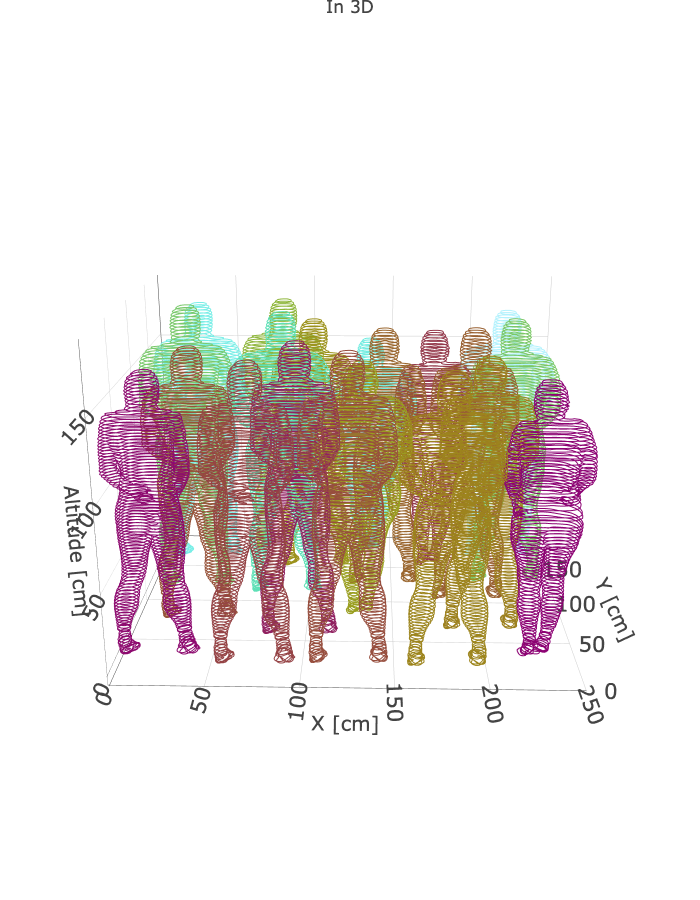

In [7]:
# Create a 3D plot of the crowd
fig_plotly: go.Figure = plot.display_crowd3D_whole_3Dscene(crowd)

# Display the generated Plotly figure in the documentation
cwd = Path(os.path.abspath(""))
path_data = cwd.parent.parent / "data"
fig_plotly.write_image(path_data / "images" / "generated" / "crowd3D.png", format="png")
Image(path_data / "images" / "generated" / "crowd3D.png")

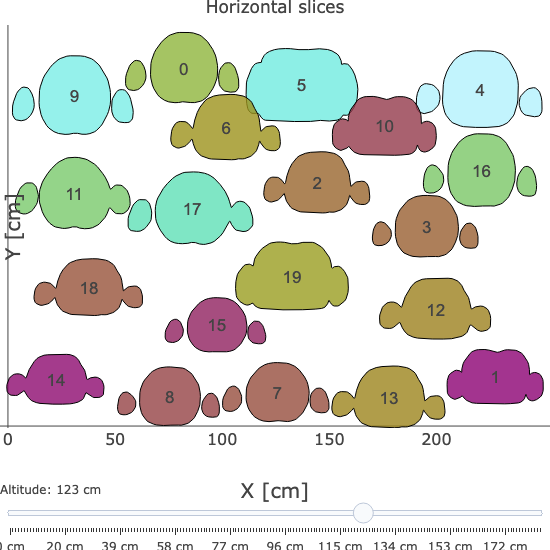

In [8]:
# Create a 3D plot of the crowd with horizontal slices
fig_plotly: go.Figure = plot.display_crowd3D_slices_by_slices(crowd)

# Display the generated Plotly figure in the documentation
path_data = cwd.parent.parent / "data"
fig_plotly.write_image(
    path_data / "images" / "generated" / "crowd3D_horizontal_slices.png", format="png"
)
Image(path_data / "images" / "generated" / "crowd3D_horizontal_slices.png")